In [2]:
import os
import sys
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath(".."))
from common import common

<module 'common.common' from '/Users/bytedance/Downloads/work/CS5344_Project/work/common/common.py'>

In [3]:
%run ../datasets/cicids.ipynb

## 1. Understand the Structure of the Data
* Inspect data types of each column
* Check dimensions of the dataset
* View initial records

In [4]:
all_df, main_labels, config = get_cicids_df()

Normal class:  0    Benign
Name: ClassLabel, dtype: object


In [5]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037240 entries, 0 to 2037239
Data columns (total 60 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Unnamed: 0                int64  
 1   Flow Duration             int64  
 2   Total Fwd Packets         int64  
 3   Total Backward Packets    int64  
 4   Fwd Packets Length Total  float64
 5   Bwd Packets Length Total  float64
 6   Fwd Packet Length Max     float64
 7   Fwd Packet Length Mean    float64
 8   Fwd Packet Length Std     float64
 9   Bwd Packet Length Max     float64
 10  Bwd Packet Length Mean    float64
 11  Bwd Packet Length Std     float64
 12  Flow Bytes/s              float64
 13  Flow Packets/s            float64
 14  Flow IAT Mean             float64
 15  Flow IAT Std              float64
 16  Flow IAT Max              float64
 17  Flow IAT Min              float64
 18  Fwd IAT Total             float64
 19  Fwd IAT Mean              float64
 20  Fwd IAT Std             

In [6]:
all_df.shape

(2037240, 60)

In [7]:
all_df.head()

,Unnamed: 0,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,ClassLabel
0,334691,51990738,3,1,43.0,6.0,31.0,14.333333,14.433757,6.0,...,0.0,0.0,0.0,0.0,51940550.0,0.00,51940552.0,51940552.0,Benign,Benign
1,8039727,117384013,80,144,974.0,199741.0,275.0,12.175000,44.683636,1460.0,...,506187.0,628091.8,950315.0,62059.0,58155176.0,132745.16,58249039.0,58061309.0,Benign,Benign
2,4848412,246,2,2,64.0,204.0,32.0,32.000000,0.000000,102.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,Benign,Benign
3,7260100,200929,13,11,1293.0,4610.0,694.0,99.461540,189.770750,1430.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,Benign,Benign
4,4998983,2446230,8,7,1144.0,1581.0,677.0,143.000000,227.969920,1173.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,Benign,Benign


## 2. Data Cleaning Check
* Check for null/missing values
* Check for wrong values
* Drop unnecessary columns

In [8]:
all_df.isnull().sum()

Unnamed: 0                  0
Flow Duration               0
Total Fwd Packets           0
Total Backward Packets      0
Fwd Packets Length Total    0
Bwd Packets Length Total    0
Fwd Packet Length Max       0
Fwd Packet Length Mean      0
Fwd Packet Length Std       0
Bwd Packet Length Max       0
Bwd Packet Length Mean      0
Bwd Packet Length Std       0
Flow Bytes/s                0
Flow Packets/s              0
Flow IAT Mean               0
Flow IAT Std                0
Flow IAT Max                0
Flow IAT Min                0
Fwd IAT Total               0
Fwd IAT Mean                0
Fwd IAT Std                 0
Fwd IAT Max                 0
Fwd IAT Min                 0
Bwd IAT Total               0
Bwd IAT Mean                0
Bwd IAT Std                 0
Bwd IAT Max                 0
Bwd IAT Min                 0
Fwd PSH Flags               0
Fwd Header Length           0
Bwd Header Length           0
Fwd Packets/s               0
Bwd Packets/s               0
Packet Len

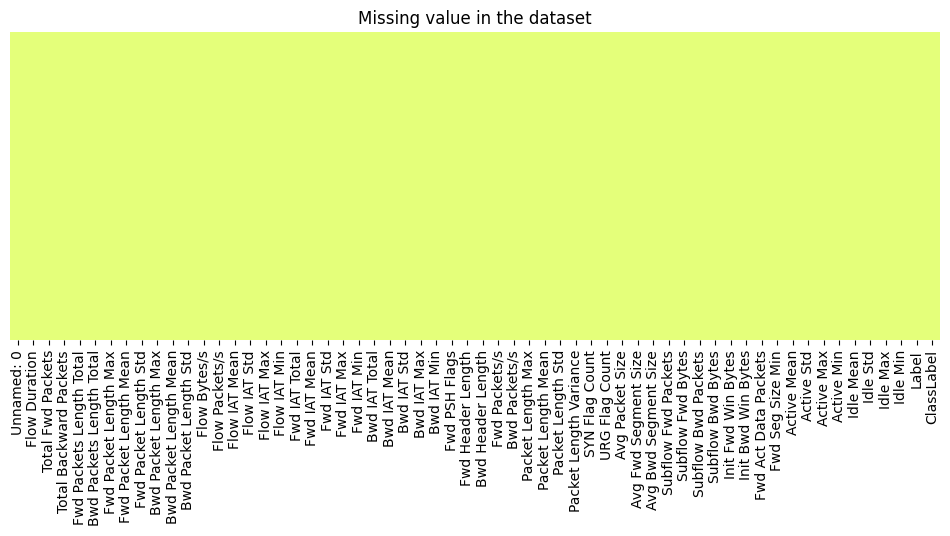

In [9]:
common.show_missing_values(all_df)

In [10]:
for col in all_df.columns:
    print(all_df[col].value_counts())
    print("--------------------------------")

Unnamed: 0
334691     1
67900      1
4548474    1
2783762    1
1379948    1
          ..
1274536    1
1046753    1
6640222    1
952078     1
9029203    1
Name: count, Length: 2037240, dtype: int64
--------------------------------
Flow Duration
1            3875
3            2607
2            1923
4            1758
48           1501
             ... 
54343278        1
53755997        1
117670261       1
5415813         1
4813756         1
Name: count, Length: 1164316, dtype: int64
--------------------------------
Total Fwd Packets
2         480273
3         331720
1         299729
5         215052
8         111189
           ...  
116320         1
140081         1
1888           1
104191         1
144529         1
Name: count, Length: 1810, dtype: int64
--------------------------------
Total Backward Packets
0       379729
1       378331
2       336024
4       267967
7       141126
         ...  
1418         1
1284         1
5757         1
1629         1
3914         1
Name: count, Len

In [24]:
all_df.drop(['Unnamed: 0'],axis=1 ,inplace=True)

## 3. Summary Statistics
* Mean, median, min, max, percentiles
* Understand data distribution for numerical features
* Check for outliers

In [11]:
all_df.describe()

,Unnamed: 0,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,...,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06,2.037240e+06
mean,4.585317e+06,1.605607e+07,4.027199e+01,1.034321e+01,2.029195e+03,1.180916e+04,2.946114e+02,8.130230e+01,1.042233e+02,6.061576e+02,...,3.569835e+01,-1.109164e+06,1.169638e+05,5.546788e+04,1.933034e+05,8.283509e+04,7.792835e+06,4.343689e+05,8.302553e+06,7.359161e+06
std,2.646401e+06,5.864290e+08,2.054067e+03,7.123964e+02,7.223378e+04,1.577816e+06,4.995259e+02,1.416223e+02,1.978874e+02,1.179677e+03,...,2.036317e+03,3.430893e+07,1.484188e+06,8.686173e+05,1.998240e+06,1.274295e+06,2.498225e+08,1.784730e+08,6.055233e+08,2.323143e+07
min,3.000000e+00,-8.282200e+11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.294050e+06,1.156200e+04,2.000000e+00,1.000000e+00,3.000000e+01,0.000000e+00,2.000000e+01,7.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.586902e+06,3.951690e+05,3.000000e+00,2.000000e+00,9.700000e+01,2.320000e+02,5.500000e+01,4.400000e+01,1.154701e+01,1.510000e+02,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.877182e+06,5.553922e+06,7.000000e+00,5.000000e+00,9.350000e+02,9.640000e+02,5.090000e+02,1.076667e+02,1.807106e+02,9.640000e+02,...,4.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,9.167577e+06,1.200000e+08,2.488000e+05,2.919220e+05,4.176568e+07,6.554530e+08,3.436800e+04,8.254954e+03,7.633714e+03,3.796000e+04,...,2.487990e+05,1.480000e+03,1.120000e+08,7.495335e+07,1.120000e+08,1.120000e+08,3.553386e+11,2.547013e+11,8.637480e+11,1.506900e+10


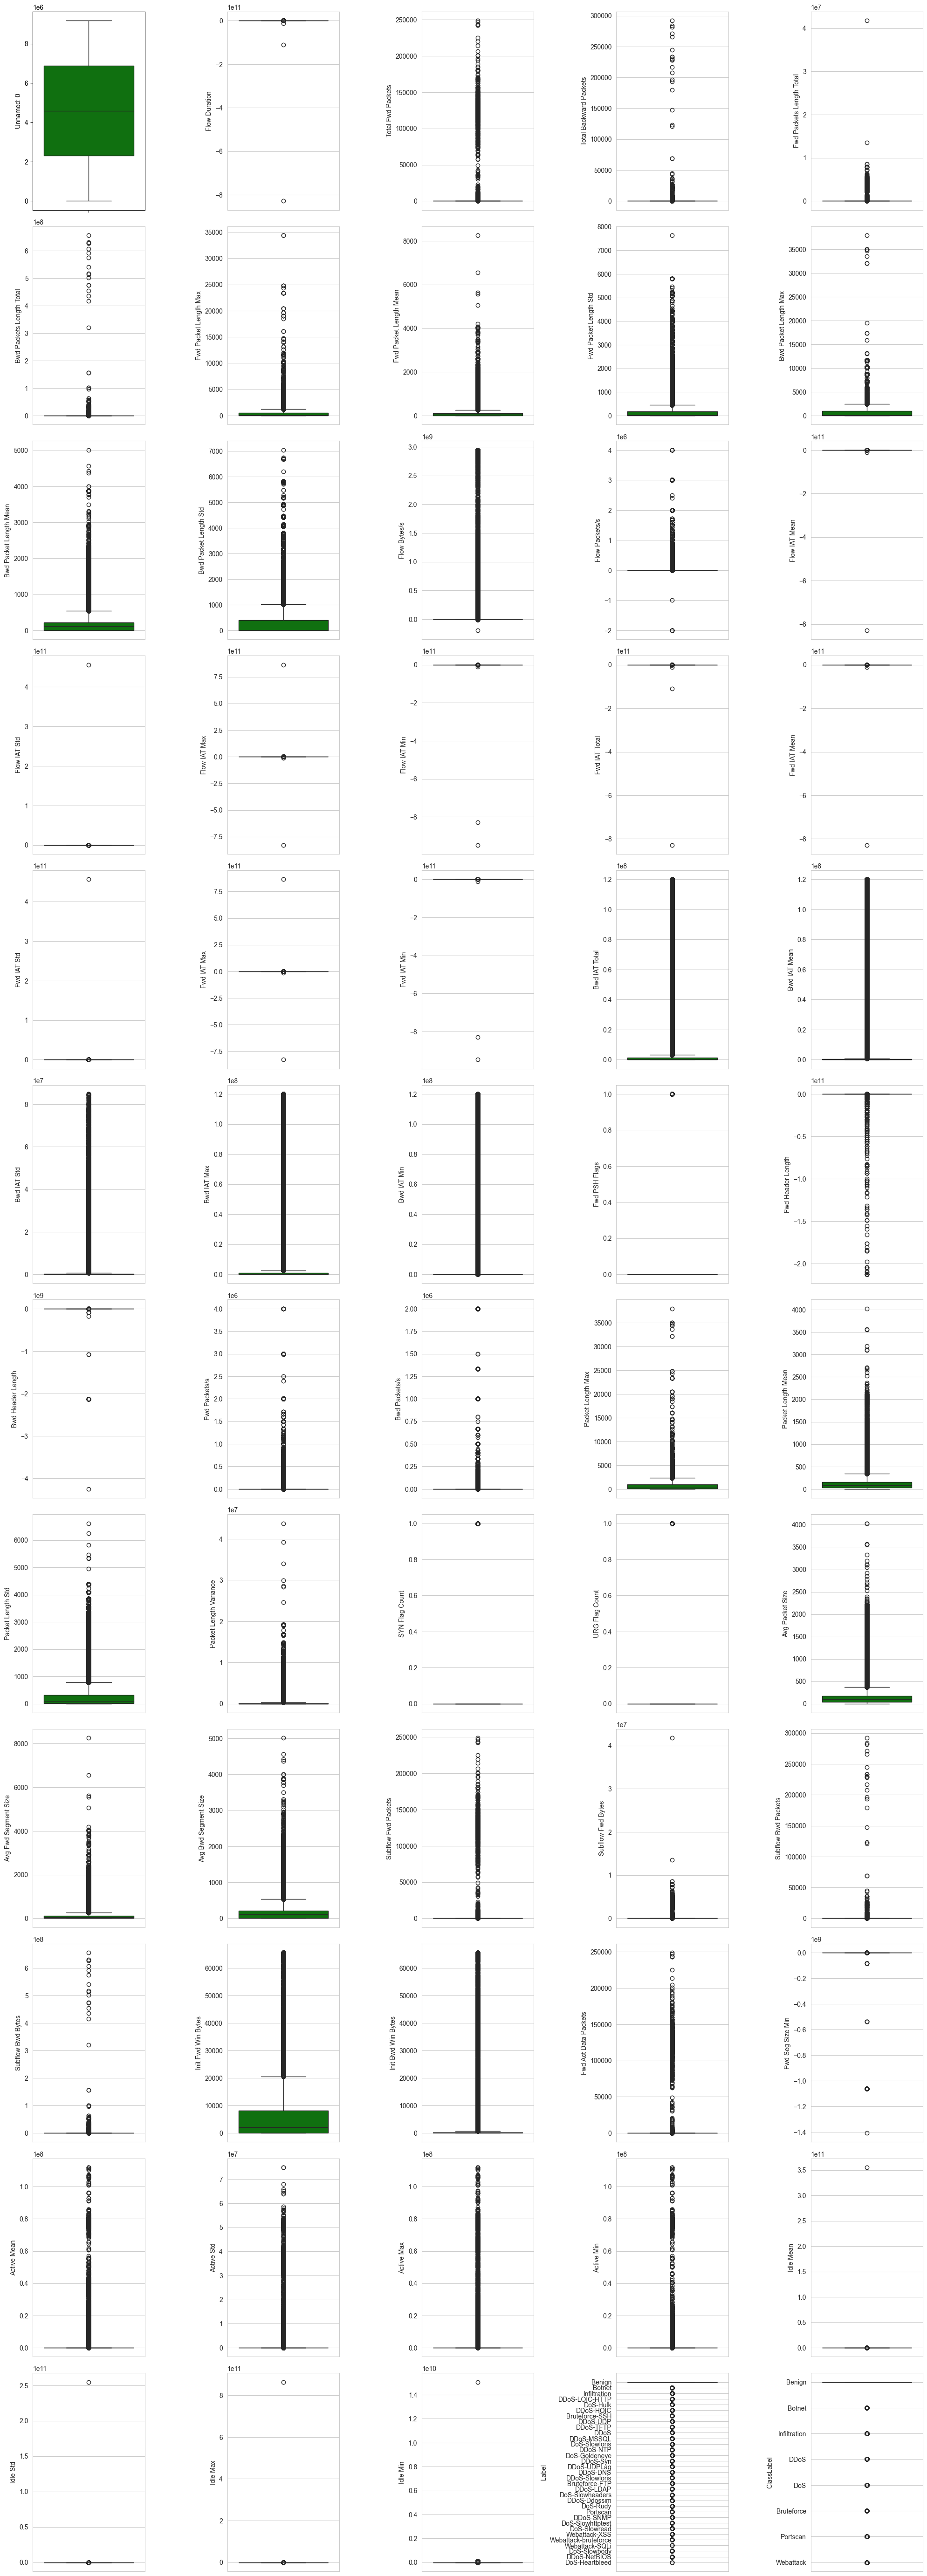

In [12]:
common.show_boxplots(all_df)

In [ ]:
columns_to_plot_distribution = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
               'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Flow Bytes/s',
               'Flow Packets/s', 'Flow IAT Mean', 'Fwd IAT Total', 'Bwd IAT Total', 'Fwd PSH Flags',
               'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
               'Bwd Packets/s', 'Packet Length Mean',
               'Avg Packet Size', 'Avg Fwd Segment Size',
               'Avg Bwd Segment Size', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
               'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init Fwd Win Bytes',
               'Init Bwd Win Bytes', 'Fwd Act Data Packets', 'Fwd Seg Size Min',
               'Active Mean', 'Idle Mean']
columns_to_plot_distribution = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets']
num_df = all_df.loc[:, columns_to_plot_distribution]
common.show_distribution_graph(num_df, columns_to_plot_distribution)

KeyboardInterrupt: 

## 4. Univariate Analysis (Single Variable)
* Categorical variables:
    * Frequency distribution
    * Bar plots or pie charts.
* Numerical variables:
    * Histograms or box plots.
    * Distribution plots

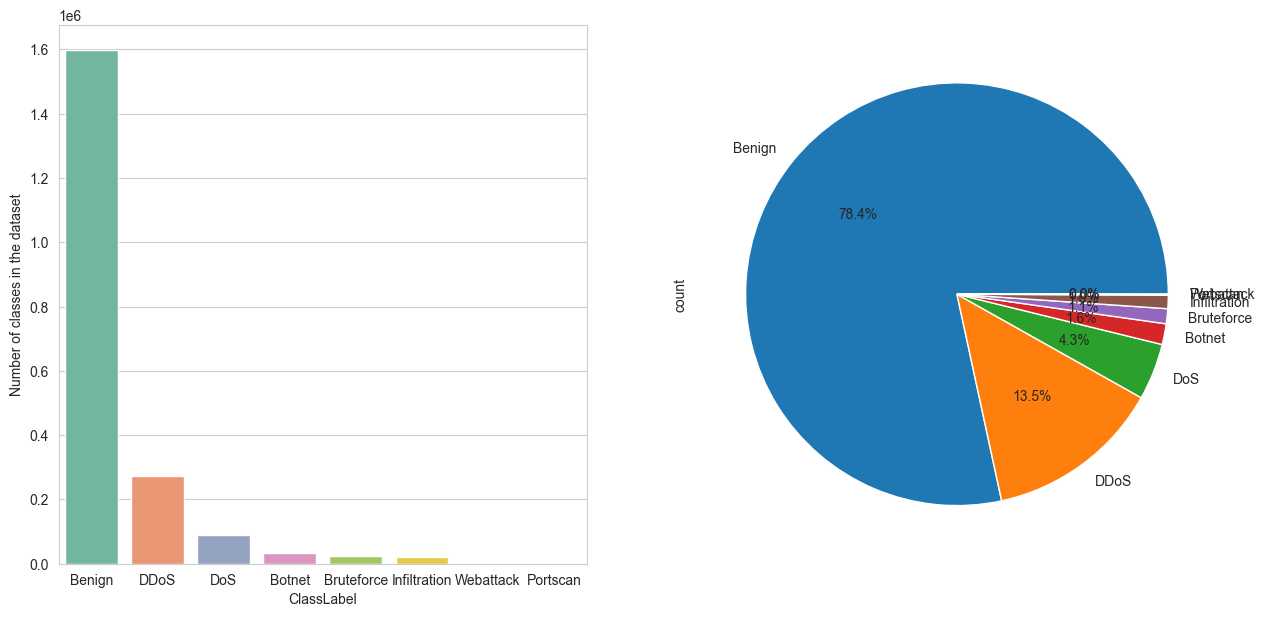

In [28]:
common.show_target_values(all_df, config['TARGET_COLUMN'])

## 5. Bivariate/Multivariate Analysis
* Correlation matrix (for numerical variables)
* Scatter plots (to assess relationships between two numerical variables)
* Pair plots (to visualize relationships across multiple variables)
* Group-wise statistics (e.g., groupby() for summarizing data by category)

In [30]:
common.show_feature_correlation(num_df)

NameError: name 'num_df' is not defined